# Case enjoei.com.br

## Lucas Serafim

Estudo desenvolvido para evidenciar o conhecimento técnico para a vaga e dar continuidade no processo seletivo.

------------------------------------------------------------------------------------------------------------------------------------------------

Enunciado:


"""
olá!
agradecemos o seu interesse em trabalhar no enjoei :)
como próxima etapa, te convidamos a resolver um estudo de caso preparado pelo nosso time
de Analytics. nesse cenário fictício você irá lidar com problemas similares ao dia a dia do time.
algumas recomendações:

● invista tempo estudando o dado - somos data-driven!

● pondere os riscos e os benefícios

● seja claro e objetivo

● a interpretação das bases faz parte do case

case:
imagine que você faz parte do time de Analytics do enjoei e é responsável por prover insights e
guiar as decisões do squad que faz parte.
nesse quarter o objetivo é reverter a tendência de vendas, que caiu ao longo do último quarter.
para visualizar os dados disponíveis, basta acessar o db que preparamos no link abaixo:
BigQuery


*perguntas:*

● quais são as aparentes causas para a queda de venda?
tente entender os principais gargalos no funil de vendas e levantar hipóteses do que
pode ter causado cada comportamento;

● existem outras informações que seriam úteis para a sua análise e que não foram
fornecidas?
por quê? quais respostas teríamos com essas informações adicionais?

● você consegue pensar em outras análises que ajudariam a alcançar o objetivo desse
quarter?

● descreva as análises, os seus benefícios e impactos nas decisões do squad.
instruções:

● ao receber esse email você terá alguns dias para resolver o problema, mas a
expectativa é que invista apenas algumas horas para analisar os dados e chegar às
conclusões;

● não há respostas corretas! será avaliado a forma como lida com os dados, as análises e
as soluções que irá propor a partir deles;

● foque no conteúdo! a solução pode ser apresentada em qualquer formato que prefira
(Google Docs, Google Slides, PowerPoint, etc). não é necessário investir tempo e
recursos em apresentações sofisticadas.porém, tenha em mente que é necessário que
tenhamos o entendimento claro dos seus pontos ao avaliar o case e que, caso seja
aprovado para a próxima etapa, haverá uma apresentação do case aos coordenadores
da área.
boa sorte!
"""
------------------------------------------------------------------------------------------------------------------------------------------------


Os dados podem ser encontrados em um repositório do Google Big Query. Para facilitar a importação e evitar problemas de integração, foi realizado o download dos dados em formato Excel.


# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
from datetime import timedelta
from datetime import date

plt.style.use('ggplot')
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Análise dos dados de Pedidos (tabela orders)

In [2]:
df_orders = pd.read_excel('orders_case.xlsx',header=0,decimal=".")
df_orders.head()

,order_id,sold_at,seller_id,buyer_id,product_id,shipped_at,order_status,order_value
0,429231,2020-04-01,741764,85410,880159,NaT,canceled,238.52
1,429355,2020-04-01,89797,894373,766143,NaT,canceled,145.18
2,429376,2020-04-01,234243,887915,300043,NaT,canceled,301.96
3,429421,2020-04-01,468085,572812,9019,NaT,canceled,89.30
4,429572,2020-04-01,698110,733143,670742,NaT,canceled,198.35


## Explorando a estrutura do dataset:

### Quantos dados nulos estão presentes em cada coluna?

In [3]:
df_orders.isnull().sum(axis = 0)

order_id            0
sold_at             0
seller_id           0
buyer_id            0
product_id          0
shipped_at      19031
order_status        0
order_value         0
dtype: int64

### Identificando o schema e distribuição do dataset

In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100125 entries, 0 to 100124
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      100125 non-null  int64         
 1   sold_at       100125 non-null  datetime64[ns]
 2   seller_id     100125 non-null  int64         
 3   buyer_id      100125 non-null  int64         
 4   product_id    100125 non-null  int64         
 5   shipped_at    81094 non-null   datetime64[ns]
 6   order_status  100125 non-null  object        
 7   order_value   100125 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 6.1+ MB


In [5]:
df_orders.describe()

,order_id,seller_id,buyer_id,product_id,order_value
count,100125.000000,100125.000000,100125.000000,100125.000000,100125.000000
mean,478963.000000,498879.772175,503313.609508,498389.457199,137.285573
std,28903.742189,287127.873973,288723.822438,288628.897595,61.269339
min,428901.000000,89.000000,6.000000,6.000000,45.000000
25%,453932.000000,257645.000000,250913.000000,247568.000000,86.510000
50%,478963.000000,489709.000000,508893.000000,497624.000000,130.130000
75%,503994.000000,748841.000000,754269.000000,747298.000000,178.120000
max,529025.000000,999873.000000,999949.000000,999995.000000,314.990000


### Determinando o intervalo analisado:

In [6]:
print("Período de análise: \nEntre",min(df_orders['sold_at']).date(),"e",max(df_orders['sold_at']).date())

Período de análise: 
Entre 2020-04-01 e 2020-06-30


Podemos perceber que o estudo cobre o comportamento de vendas dos meses de Abril, Maio e Junho do ano de 2020.

### Relação de preço e abandono do carrinho:

In [68]:
df_orders.groupby('order_status')['order_value'].mean()

order_status
canceled     170.690873
completed    129.446074
Name: order_value, dtype: float64

## Observando o comporamento dos pedidos de acordo com a compra ou abandono do carrinho:


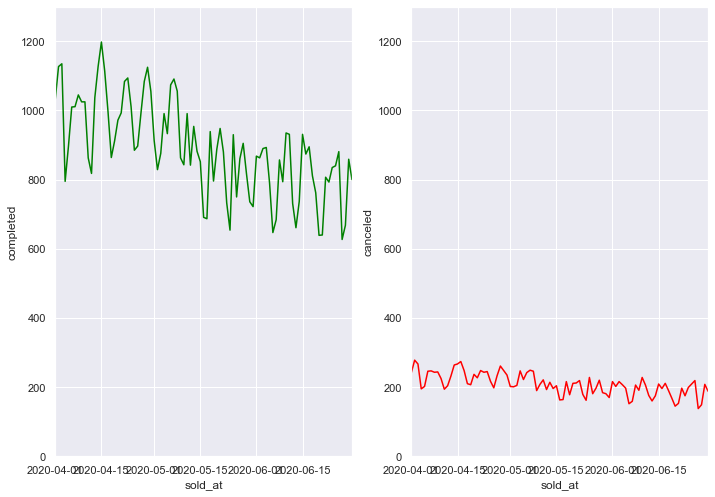

In [7]:
daily_orders = df_orders.groupby('sold_at')['order_status'].value_counts().unstack()
fig, axs = plt.subplots(ncols=2)
ax1 = sns.lineplot(x=daily_orders.index, y='completed', data=daily_orders, ax=axs[0], color='green')
ax2 = sns.lineplot(x=daily_orders.index, y='canceled', data=daily_orders, ax=axs[1], color='red')
ax1.set(ylim=(0,1300))
ax2.set(ylim=(0,1300))
ax1.set(xlim=(min(df_orders['sold_at']).date(),max(df_orders['sold_at']).date()))
ax2.set(xlim=(min(df_orders['sold_at']).date(),max(df_orders['sold_at']).date()))

fig = ax1.get_figure()
fig.savefig('daily_orders_completed.png')


fig = ax2.get_figure()
fig.savefig('daily_orders_canceled.png')



Podemos perceber que existe uma queda no número de pedidos realizados, a partir da metade o mês de maio

### Calculando o tempo médio de envio do pedido 📦 

In [9]:
df_mod = df_orders
df_mod[['sold_at','shipped_at']] = df_mod[['sold_at','shipped_at']].apply(pd.to_datetime) 
df_mod['shipping_delay'] = (df_mod['shipped_at']-df_mod['sold_at']).dt.days
df_mod.shipping_delay.mean()

1.6157792191777443

## Calculando faturamento diário

Foi criado um novo dataset a partir do dataset original *df_orders* : *df_sales*

No novo conjunto de dados, estão presentes apenas pedidos com o status = *'completed'*

In [10]:
df_sales=df_orders[df_orders['order_status']=='completed']
sales_income = pd.DataFrame(df_sales.groupby('sold_at').order_value.sum()).reset_index()
sales_income.index = np.arange(len(sales_income))
mean_income = sales_income['order_value'].mean()

## Observando a evolução do faturamento e realizando apontamentos

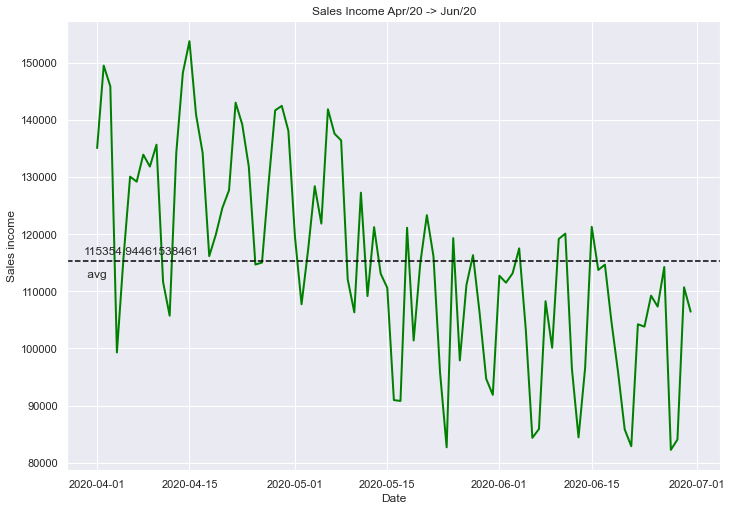

In [11]:
graph = sns.lineplot(x = 'sold_at', y = 'order_value', data = sales_income, palette='rocket',color='green',linewidth=2)
graph.axhline(sales_income['order_value'].mean(), ls='--',color='black')
graph.set(xlabel='Date',ylabel='Sales income',title='Sales Income Apr/20 -> Jun/20')
graph.text(x = pd.Timestamp('2020-03-30'),y = sales_income['order_value'].mean()-3000,s = f'{mean_income}\n\n avg')
fig = graph.get_figure()
fig.savefig('sales.png')

Pode-se perceber que o valor de faturamento permaneceu acima da média (115,35k) desde o início do acompanhamento até os arredores do dia 15/05.

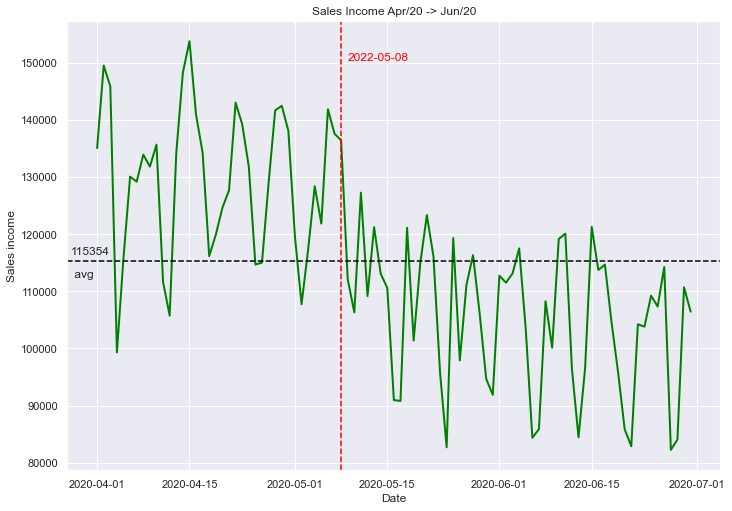

In [12]:
graph = sns.lineplot(x = 'sold_at', y = 'order_value', data = sales_income, palette='rocket',color='green',linewidth=2)
graph.axhline(sales_income['order_value'].mean(), ls='--',color='black')
graph.axvline(pd.Timestamp('2020-05-08') , ls='--',color='red')

graph.set(xlabel='Date',ylabel='Sales income',title='Sales Income Apr/20 -> Jun/20')
graph.text(x = pd.Timestamp('2020-03-28'),y = sales_income['order_value'].mean()-3000,s = f'{int(mean_income)}\n\n avg')
graph.text(x = pd.Timestamp('2020-05-09'),y = sales_income['order_value'].mean()+35000,s = '2022-05-08',color='red')
fig = graph.get_figure()
fig.savefig('sales_parameters.png')

Pode-se afirmar que o último **pico significativo** de faturamento ocorreu no dia **08/05**.

Essa é uma informação relevante que servirá para sustentar uma das hipotéses que será levantada futuramente.

In [13]:
daily_orders = df_sales.groupby('sold_at').order_id.count().reset_index()

In [14]:
daily_orders = daily_orders.rename(columns={'order_id':'orders'})

In [15]:
daily_orders.corr()

,orders
orders,1.0


## Analisando o volume diário de pedidos realizados

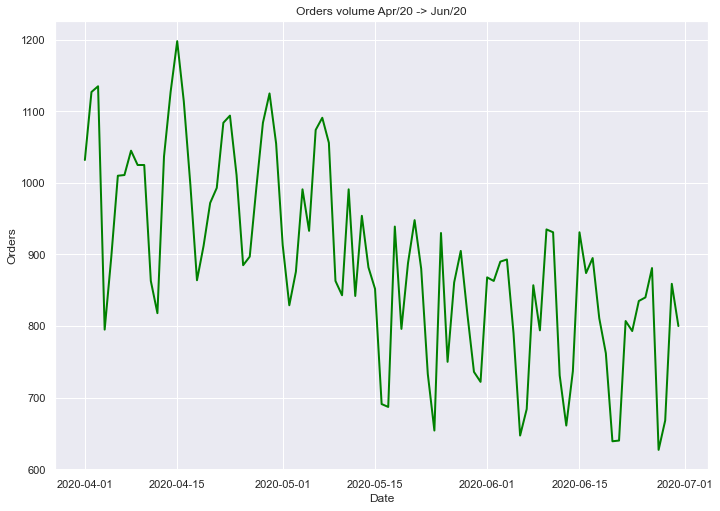

In [16]:
graph = sns.lineplot(x = 'sold_at', y = 'orders', data = daily_orders, palette='rocket',color='green',linewidth=2)
graph.set(xlabel='Date',ylabel='Orders',title='Orders volume Apr/20 -> Jun/20')
fig = graph.get_figure()
fig.savefig('orders.png')

In [17]:
daily_sales = sales_income.merge(daily_orders, on='sold_at')

In [18]:
daily_sales['average ticket'] = daily_sales['order_value']/daily_sales['orders'] 

In [19]:
daily_sales = daily_sales.rename(columns={'order_value':'daily income'})

## Analisando o comportamento do usuário (comprador):

In [20]:
df_buyers = df_sales.groupby('sold_at').buyer_id.count().reset_index().rename(columns = {'buyer_id':'buyers'})

In [21]:
daily_sales = daily_sales.merge(df_buyers, on='sold_at')
daily_sales = daily_sales.rename(columns={'sold_at':'date'})

In [22]:
daily_sales['over_sales'] = daily_sales.orders - daily_sales.buyers
daily_sales.head()

,date,daily income,orders,average ticket,buyers,over_sales
0,2020-04-01,135037.59,1032,130.850378,1032,0
1,2020-04-02,149464.26,1127,132.621349,1127,0
2,2020-04-03,145831.22,1135,128.485656,1135,0
3,2020-04-04,99305.19,795,124.912189,795,0
4,2020-04-05,115865.05,896,129.313672,896,0


#### NENHUM DIA COM DUAS OU MAIS COMPRAS POR USUÁRIO

In [23]:
daily_sales.over_sales.value_counts() 

0    91
Name: over_sales, dtype: int64

In [24]:
daily_sales = daily_sales.drop(columns=['over_sales'])

# Dados do funil:

### Importando os dados e unindo com informações da tabela de pedidos

In [25]:
df_funnel = pd.read_excel('funnel_case.xlsx',header=0)
df_funnel = df_funnel.sort_values('date')

In [26]:
df_funnel = df_funnel.merge(daily_sales, on='date') 
df_funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            91 non-null     datetime64[ns]
 1   visits          91 non-null     int64         
 2   product_views   91 non-null     int64         
 3   carts_created   91 non-null     int64         
 4   daily income    91 non-null     float64       
 5   orders          91 non-null     int64         
 6   average ticket  91 non-null     float64       
 7   buyers          91 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 6.4 KB


### Calculando a taxa de conversão diária (Pedidos/Visitas)

In [27]:
df_funnel['conv ratio'] = df_funnel['orders']/df_funnel['visits']
df_funnel['buyer interest'] = df_funnel['carts_created']/df_funnel['product_views']

### Visualizando os dados:

#### Dados de visualizações diárias

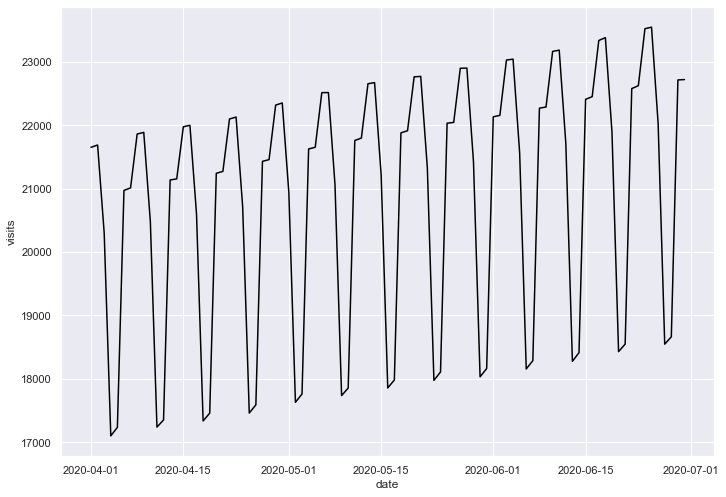

In [28]:
graph = sns.lineplot(x='date',y='visits',data = df_funnel,color='black') #numero de visitas crescendo, porém com quedas bruscas nos finais de semana [1- desligamento de campanha? 2-comporatamento dos usuários])
fig = graph.get_figure()
fig.savefig('visits.png')

Pode-se perceber que existe uma tendência crescente na quantidade de visualizações do site.
Porém, analisando os vales periódicos, podemos inferir que a entrada de novos usuários no site, não acontece de maneira 100% orgânica.
O fato de existerem vales, sempre em finais de semana, mostra que talvez exista alguma campanha de marketing que fica ativa durante os dias úteis, e é desligada nos finais de semana, fazendo com que o tráfego de visitas aconteça de maneira orgânica nesses vales.

#### Dados de visualizações de produtos

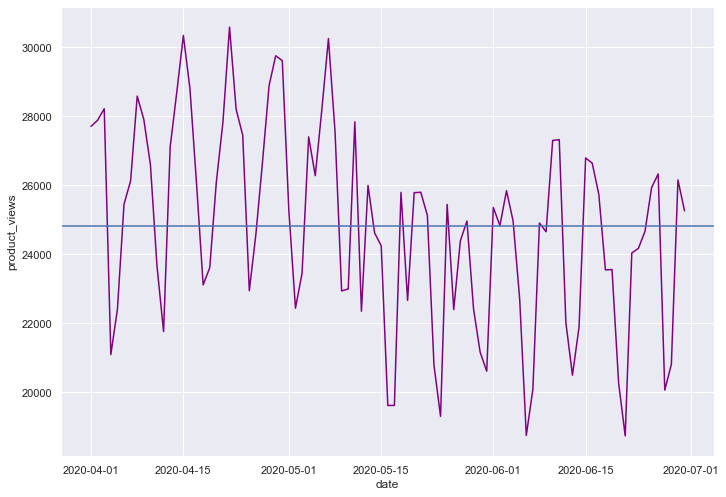

In [41]:
graph = sns.lineplot(x='date',y='product_views',data = df_funnel, color='purple')
graph.axhline(df_funnel['product_views'].mean())

#### Visualizando a criação de carrinhos (possíveis compras)

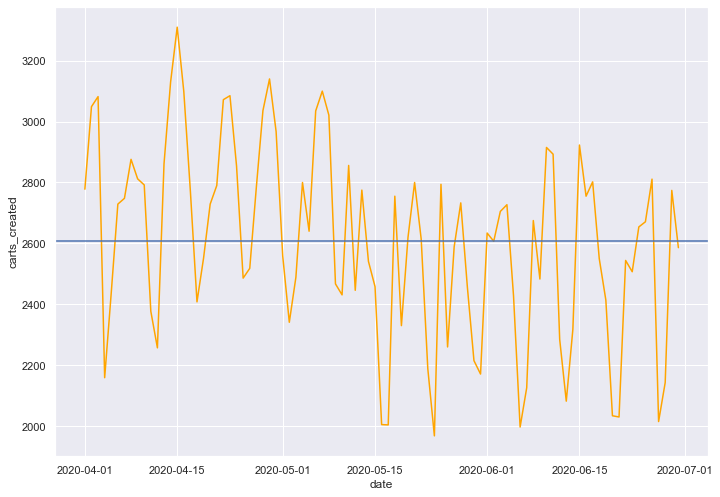

In [45]:
graph = sns.lineplot(x='date',y='carts_created',data = df_funnel, color='orange')
graph.axhline(df_funnel['carts_created'].mean())

#### Visualizando o comportamento das taxas de conversões diárias

<AxesSubplot:xlabel='date', ylabel='conv ratio'>

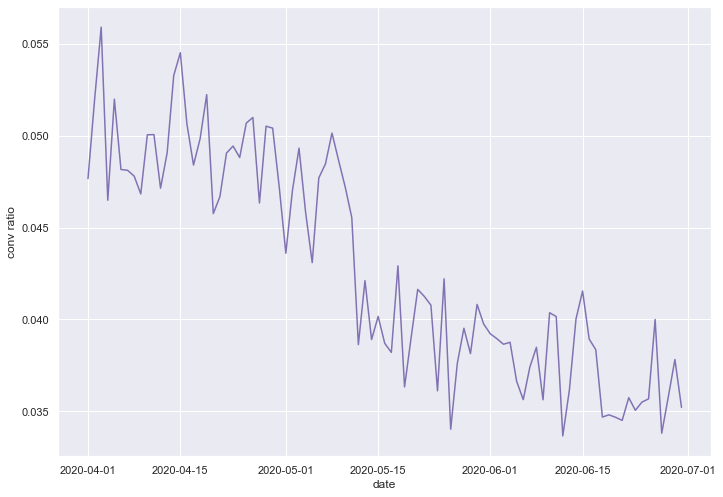

In [52]:
sns.lineplot(data=df_funnel, x='date',y='conv ratio',color='m')

Podemos observar que, mesmo com uma tendência crescente no número de visitas no site, as taxas de conversão vem caindo ao longo do tempo.
Isso pode ser um indício de que algum evento, em meados de Maio, tenha causado despertado interesse no público atingido pelas campanhas e que, após esse evento, os esforços para trazer novos usuários diários para o site não estão sendo convertidos, de fato, em vendas.

### Correlação entre as variáveis

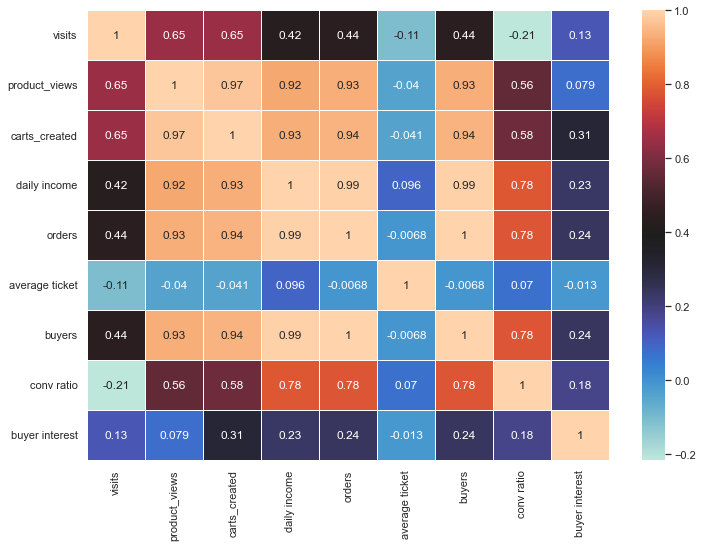

In [32]:
graph = sns.heatmap(df_funnel.corr(), annot=True,linewidths=.5,cmap="icefire")
fig = graph.get_figure()
fig.savefig('heat_map_funil.png')

A tabela de correlação mostra o quanto determinada variável é influenciada por outra no modelo estatístico.
Dessa forma, conseguimos perceber a relação entre a quantidade de visitas nos site e as outras interações do comprador com a plataforma (visualização de produto, criação de carrinho e receita).

Um ponto interessante a ressaltar é a relação inversa entre a quantidade de visitas e a taxa de conversão.
Isso mostra que, dentro do período analisado, quanto mais clientes são atraídos para o site, menor a chance desse cliente converter uma compra. Logo, mostramos que mesmo conseguindo atrair mais clientes, não conseguimos um lead qualificado, não transformando esse volume crescente de visita em conversões.


# Conclusões

De acordo com os dados apresentados:


1) A plataforma possui uma estratégia de captação de leads que vem trazendo resultados crescentes em questão de volume de acessos. Porém, esse grande volume de acessos não vem trazendo resultados proporcionais em relação a número de vendas ou receita, mostrando que esses usuários impactados pelas campanhas não estão despertando interesse em realizar uma compra.

2) Durante o período analisado, a média de preços dos pedidos com carrinho abandonado, são cerca de R$50,00 superiores aos carrinhos que se converteram em vendas. Isso pode ser um indicador interessante para determinar precificação de produtos.

3) O volume de vendas teve uma queda expressiva por volta da metade do mês de Maio. Isso mostra que existiu algum evento, que gerou o interesse de compra dos clientes e que, após esse evento, a necessidade ou interesse de compra caiu. Sugiro que esse evento tenha sido o **DIA DAS MÃES**. O dia das mães aconteceu no dia 10/05/2020, o que evidencia ainda mais a afirmação, visto que o volume de vendas começa a cair a partir do dia 08/05/2020.
